In [43]:
import json

words_time = []
with open("./words_time.json", "r") as f:
    words_time = json.load(f)
    
transcript = words_time['actions'][0]["result"]["document"]

In [45]:
phrases = []
with open("./phrases_sentiment.json", "r") as g:
    phrases = json.load(g)
    
positive_phrases = phrases["positive"]
p_neg = phrases["negative"]
p_agg = phrases["aggregate"]

In [93]:
t = 0; # transcript; the words

# todo
def match_phrase(transcript, t_index, phrase):
    return None

timestamps = []
phrase_index = 0
while phrase_index < len(positive_phrases):
    phrase_words = positive_phrases[phrase_index]["original_text"].split(" ")
    
#     print phrase_words
#     print t
#     print len(transcript)
    while transcript[t]["content"] != phrase_words[0]:
        t += 1
    
    # t now points to the first index in the transcript for the first phrase word
    
    # match the rest of the phrase
    u = t + 1
    is_full_match = True
    for v in xrange(1, len(phrase_words)):
        if phrase_words[v] != transcript[u]["content"]:
            is_full_match = False
            break
        u += 1
    
    if is_full_match:
        seg = transcript[t:t+len(phrase_words)]
    
#         print "Matched: " , " ".join(phrase_words), " Starts at: ", seg[0]["offset"], " Ends at: ", seg[-1]["offset"]
#         res = ""
#         for s in seg:
#             res += s["content"] + " "
#         print res, "\n\n"

        timestamps.append( [ " ".join(phrase_words), positive_phrases[phrase_index]["score"], seg[0]["offset"] , seg[-1]["offset"]]) 
        # move to the next transcript word and next phrase (yes part of the same phrase will be re-searched)
        phrase_index += 1

    t += 1 
    
print timestamps

[[u'the experience amazing experience of going to hack this', 0.7352054609465631, 9500, 13580], [u'is an amazing experience', 0.859327910498872, 13940, 14600], [u'interesting people', 0.6280145725181376, 16930, 17430], [u'create innovative ideas and solutions to problems', 0.7923352042939829, 19490, 22460], [u'it is a great', 0.9025871577819432, 26590, 26810], [u'encourage everyone to work', 0.8303585105859703, 29390, 30520], [u'this thank you', 0.6748984055823062, 30850, 31700]]


In [94]:
last = transcript[-1]
normalizer = last["offset"] + last["duration"]

In [95]:
%matplotlib inline
import matplotlib.pyplot as plt

In [96]:
# normalize start and end timestamps
tagged_phrases = timestamps
for phrase in tagged_phrases:
    phrase[2] /= float(normalizer)
    phrase[3] /= float(normalizer)

In [97]:
tagged_phrases

[[u'the experience amazing experience of going to hack this',
  0.7352054609465631,
  0.2985543683218102,
  0.42677561282212445],
 [u'is an amazing experience',
  0.859327910498872,
  0.4380892520427404,
  0.45883092394720304],
 [u'interesting people',
  0.6280145725181376,
  0.5320553111250785,
  0.5477686989314896],
 [u'create innovative ideas and solutions to problems',
  0.7923352042939829,
  0.6125078566939032,
  0.7058453802639849],
 [u'it is a great',
  0.9025871577819432,
  0.8356379635449402,
  0.8425518541797612],
 [u'encourage everyone to work',
  0.8303585105859703,
  0.9236329352608422,
  0.9591451917033312],
 [u'this thank you',
  0.6748984055823062,
  0.9695160276555626,
  0.9962287869264613]]

In [108]:
x = []
y = []
labels = []
for p in tagged_phrases:
    x += [p[2]]
    y += [p[1]]
    labels += [p[0]]
print x
print y

[0.2985543683218102, 0.4380892520427404, 0.5320553111250785, 0.6125078566939032, 0.8356379635449402, 0.9236329352608422, 0.9695160276555626]
[0.7352054609465631, 0.859327910498872, 0.6280145725181376, 0.7923352042939829, 0.9025871577819432, 0.8303585105859703, 0.6748984055823062]


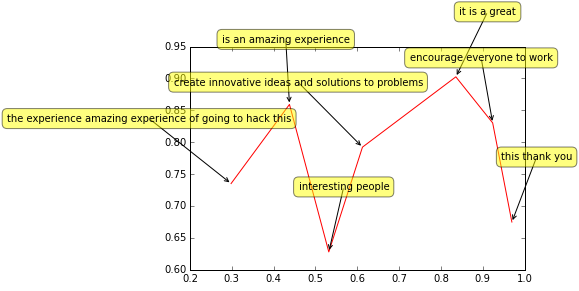

In [111]:
plt.plot(x,y,'r-')

for label, xx ,yy in zip(labels, x, y):
    plt.annotate(label, xy = (xx, yy), xytext = (60,60), textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

plt.show()

In [103]:
for p in tagged_phrases:
    print p[0]

the experience amazing experience of going to hack this
is an amazing experience
interesting people
create innovative ideas and solutions to problems
it is a great
encourage everyone to work
this thank you
